In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_auc_score,roc_curve,auc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df1 = pd.read_csv('final.csv')
result = []
df1.head(5)

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Delivery Type,Systolic Blood Pressure,Diastolic Blood Pressure,Edema,Anemia,Jaundice,Diabetes,Risk,Para,Gravida
0,25,1.4732,53.3,23.73,No,Normal,120,70,Normal,Low,No,No,No,2,3
1,30,1.5740,45.5,18.37,No,Normal,110,80,Normal,Normal,No,No,No,1,2
2,20,1.6250,52.2,19.77,No,No_delivary,120,70,Normal,Low,No,No,No,0,1
3,22,1.4480,48.5,23.14,No,No_delivary,110,80,Normal,Low,No,No,No,0,1
4,26,1.5240,50.0,21.53,No,No_delivary,110,70,Normal,Normal,No,No,No,0,1


In [3]:
for i in range(len(df1)):
    df1.loc[i,'parity'] = df1.loc[i,'Gravida'] - df1.loc[i,'Para']
df1['parity'] = df1['parity'].astype(int)

In [4]:
df1 = df1.drop(['Para','Gravida'],axis=1)
df1.head(5)

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Delivery Type,Systolic Blood Pressure,Diastolic Blood Pressure,Edema,Anemia,Jaundice,Diabetes,Risk,parity
0,25,1.4732,53.3,23.73,No,Normal,120,70,Normal,Low,No,No,No,1
1,30,1.5740,45.5,18.37,No,Normal,110,80,Normal,Normal,No,No,No,1
2,20,1.6250,52.2,19.77,No,No_delivary,120,70,Normal,Low,No,No,No,1
3,22,1.4480,48.5,23.14,No,No_delivary,110,80,Normal,Low,No,No,No,1
4,26,1.5240,50.0,21.53,No,No_delivary,110,70,Normal,Normal,No,No,No,1


In [5]:
df1.shape

(3578, 14)

In [6]:
df1['Blood Group ( is Negative?)'] = df1['Blood Group ( is Negative?)'].map({'Yes':1,'No':0})
df1['Jaundice'] = df1['Jaundice'].map({'Yes':1,'No':0})
df1['Diabetes'] = df1['Diabetes'].map({'Yes':1,'No':0})
df1['Risk'] = df1['Risk'].map({'Yes':1,'No':0})
df1['Delivery Type'] = df1['Delivery Type'].map({'No_delivary':0,'Normal':1,'C-section':2})
df1['Edema'] = df1['Edema'].map({'Normal':0,'High':2,'Modarate':1})
df1['Anemia'] = df1['Anemia'].map({'Normal':0,'Low':1,'Very-Low':2})

In [7]:
ss = df1.sample(15)
ss

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Delivery Type,Systolic Blood Pressure,Diastolic Blood Pressure,Edema,Anemia,Jaundice,Diabetes,Risk,parity
5,26,1.473,52.0,23.96,0,0,120,90,0,0,0,0,0,2
1046,38,1.574,62.3,25.12,0,0,120,70,0,0,0,0,1,2
3027,30,1.524,71.0,30.57,0,1,100,70,0,0,0,0,0,2
2162,19,1.549,61.0,25.42,0,0,120,70,0,0,0,0,0,1
2488,28,1.499,57.5,25.59,0,0,125,80,0,1,0,0,0,1
2617,23,1.575,55.0,22.17,0,1,120,80,0,0,0,0,0,1
2148,19,1.524,53.0,22.82,0,1,120,70,0,0,0,0,0,2
965,24,1.397,66.0,33.82,0,1,90,60,2,2,1,1,1,1
253,19,1.549,58.2,24.24,0,0,140,90,0,1,0,0,0,1
3429,21,1.575,47.0,18.95,0,0,120,70,0,1,0,0,0,2


In [8]:
# from sklearn.model_selection import train_test_split

# X = df1.drop(['Risk','Height','Weight'],axis=1)
# y = df1.Risk

# x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [9]:
length = int(len(df1)*0.70)

train = df1[:length]
test = df1[length:]

x_train = train.drop(['Risk','Height','Weight'],axis=1)
y_train = train.Risk

x_test = test.drop(['Risk','Height','Weight'],axis=1)
y_test = test.Risk

In [10]:
train.shape

(2504, 14)

In [11]:
test.shape

(1074, 14)

In [12]:
# def model(model,i):
#     print(i,'.',model,':\n')
#     model = model.fit(x_train,y_train)

#     #train data
#     y_pred = model.predict(x_train)
#     print('\tTraining Data:')
#     print('\t\t> Accuracy: ', round(accuracy_score(y_train,y_pred),2)*100,'%',end=" ")
#     print('\t> f1_score: ', round(f1_score(y_train,y_pred),2)*100,'%',end=" ")
#     print('\t> precision_score: ', round(precision_score(y_train,y_pred),2)*100,'%',end=" ")
#     print('\t> recall_score: ', round(recall_score(y_train,y_pred),2)*100,'%',end=" ")

#     #test data
#     y_pred = model.predict(x_test)
#     print('\n\tTesting Data:')
#     print('\t\t> Accuracy: ', round(accuracy_score(y_test,y_pred),2)*100,'%',end=" ")
#     print('\t> f1_score: ', round(f1_score(y_test,y_pred),2)*100,'%',end=" ")
#     print('\t> precision_score: ', round(precision_score(y_test,y_pred),2)*100,'%',end=" ")
#     print('\t> recall_score: ', round(recall_score(y_test,y_pred),2)*100,'%','\n')

In [13]:
# model(LogisticRegression(),1)
# model(SVC(),2)
# model(DecisionTreeClassifier(),3)
# model(RandomForestClassifier(),4)
# model(KNeighborsClassifier(),5)
# model(GaussianNB(),6)
# model(MultinomialNB(),7)

In [14]:
# #best model
# model = RandomForestClassifier().fit(x_train,y_train)
# #train data
# y_train_pred = model.predict(x_train)
# print('Training Data:')
# print('\t> Accuracy:', round(accuracy_score(y_train,y_train_pred),2)*100,'%')
# print('\t> f1_score:', round(f1_score(y_train,y_train_pred),2)*100,'%')
# print('\t> precision_score:', round(precision_score(y_train,y_train_pred),2)*100,'%')
# print('\t> recall_score:', round(recall_score(y_train,y_train_pred),2)*100,'%')

# #test data
# y_test_pred = model.predict(x_test)
# print('\nTesting Data:')
# print('\t> Accuracy:', round(accuracy_score(y_test,y_test_pred),2)*100,'%')
# print('\t> f1_score:', round(f1_score(y_test,y_test_pred),2)*100,'%')
# print('\t> precision_score:', round(precision_score(y_test,y_test_pred),2)*100,'%')
# print('\t> recall_score:', round(recall_score(y_test,y_test_pred),2)*100,'%')

In [15]:
# tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
# print(tn,fp,fn,tp)

In [16]:
# accuracy = (tp+tn)/(len(test))
# accuracy

In [17]:
# f_score = (2*tp)/((2*tp)+fp+fn)
# f_score

In [18]:
# precision = tp/(tp+fp)
# precision

In [19]:
# recall = tp/(tp+fn)
# recall

In [20]:
# print(y_test.value_counts())
# # plt.figure(figsize=(10,8))
# ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,display_labels=['No Risk','Risk'])
# # print(cm)
# # sns.heatmap(cm,annot=True)
# # plt.savefig('Random Forest Confusion Matries.jpg')
# plt.show()

precision :  0.92
recall :  0.78
f1_masure :  0.84
se :  0.78
sp :  0.97
acc :  0.92
auc :  0.92


<Figure size 144x216 with 0 Axes>

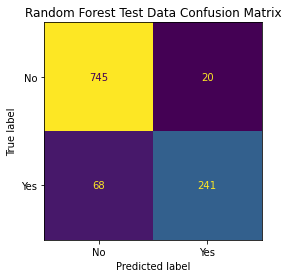

Yes as Yes (TP):  241
No as No   (TN):  745
No as Yes  (FP):  20
yes as No  (FN):  68


In [21]:
clf = RandomForestClassifier().fit(x_train,y_train)
RF_pred = clf.predict(x_test)
RF_proba = clf.predict_proba(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,RF_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
f1_masure = round((2*precision*recall)/(precision+recall),2)
se = round((tp/(tp+fn)),2)
sp = round((tn/(tn+fp)),2)
acc = round(((tp+tn)/len(x_test)),2)
auc_ = round((roc_auc_score(y_test,RF_proba[:,1])),2)

print("precision : ",precision)
print("recall : ",recall)
print("f1_masure : ",f1_masure)
print("se : ",se)
print("sp : ",sp)
print("acc : ",acc)
print("auc : ",auc_)

result.append({
    'Classifier': 'Random Forest',
    'Precision': precision,
    'Se/Recall':recall,
    'Sp':sp,
    'F1-Measure':f1_masure,
    'Accuracy':acc,
    'AUC':auc_
})
plt.figure(figsize=(2, 3))
ConfusionMatrixDisplay.from_predictions(y_test,RF_pred,display_labels=['No','Yes'],colorbar = False)
plt.title('Random Forest Test Data Confusion Matrix')
plt.show()
print('Yes as Yes (TP): ',tp)
print('No as No   (TN): ',tn)
print('No as Yes  (FP): ',fp)
print('yes as No  (FN): ',fn)

precision :  0.97
recall :  0.69
f1_masure :  0.81
se :  0.69
sp :  0.99
acc :  0.9
auc :  0.83


<Figure size 144x216 with 0 Axes>

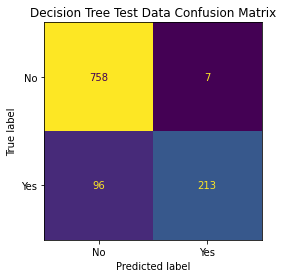

Yes as Yes (TP):  213
No as No   (TN):  758
No as Yes  (FP):  7
yes as No  (FN):  96


In [22]:
clf = DecisionTreeClassifier(max_depth=15).fit(x_train,y_train)
DT_pred = clf.predict(x_test)
DT_proba = clf.predict_proba(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,DT_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
f1_masure = round((2*precision*recall)/(precision+recall),2)
se = round((tp/(tp+fn)),2)
sp = round((tn/(tn+fp)),2)
acc = round(((tp+tn)/len(x_test)),2)
auc_ = round((roc_auc_score(y_test,DT_proba[:,1])),2)

print("precision : ",precision)
print("recall : ",recall)
print("f1_masure : ",f1_masure)
print("se : ",se)
print("sp : ",sp)
print("acc : ",acc)
print("auc : ",auc_)


result.append({
    'Classifier': 'Decision Tree',
    'Precision': precision,
    'Se/Recall':recall,
    'Sp':sp,
    'F1-Measure':f1_masure,
    'Accuracy':acc,
    'AUC':auc_
})
plt.figure(figsize=(2, 3))
ConfusionMatrixDisplay.from_predictions(y_test,DT_pred,display_labels=['No','Yes'],colorbar = False)
plt.title('Decision Tree Test Data Confusion Matrix')
plt.show()
print('Yes as Yes (TP): ',tp)
print('No as No   (TN): ',tn)
print('No as Yes  (FP): ',fp)
print('yes as No  (FN): ',fn)

precision :  0.87
recall :  0.27
f1_masure :  0.41
se :  0.27
sp :  0.98
acc :  0.78
auc :  0.75


<Figure size 144x216 with 0 Axes>

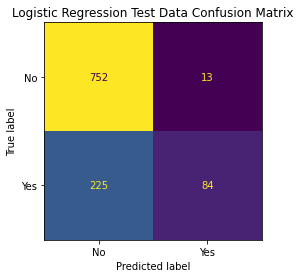

Yes as Yes (TP):  84
No as No   (TN):  752
No as Yes  (FP):  13
yes as No  (FN):  225


In [23]:
clf = LogisticRegression().fit(x_train,y_train)
Los_pred = clf.predict(x_test)
Los_proba = clf.predict_proba(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,Los_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
f1_masure = round((2*precision*recall)/(precision+recall),2)
se = round((tp/(tp+fn)),2)
sp = round((tn/(tn+fp)),2)
acc = round(((tp+tn)/len(x_test)),2)
auc_ = round((roc_auc_score(y_test,Los_proba[:,1])),2)

print("precision : ",precision)
print("recall : ",recall)
print("f1_masure : ",f1_masure)
print("se : ",se)
print("sp : ",sp)
print("acc : ",acc)
print("auc : ",auc_)


result.append({
    'Classifier': 'Logistic Regression',
    'Precision': precision,
    'Se/Recall':recall,
    'Sp':sp,
    'F1-Measure':f1_masure,
    'Accuracy':acc,
    'AUC':auc_
})
plt.figure(figsize=(2, 3))
ConfusionMatrixDisplay.from_predictions(y_test,Los_pred,display_labels=['No','Yes'],colorbar = False)
plt.title('Logistic Regression Test Data Confusion Matrix')
plt.show()
print('Yes as Yes (TP): ',tp)
print('No as No   (TN): ',tn)
print('No as Yes  (FP): ',fp)
print('yes as No  (FN): ',fn)

precision :  0.92
recall :  0.43
f1_masure :  0.59
se :  0.43
sp :  0.98
acc :  0.82
auc :  0.8


<Figure size 144x216 with 0 Axes>

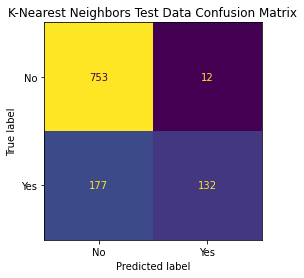

Yes as Yes (TP):  132
No as No   (TN):  753
No as Yes  (FP):  12
yes as No  (FN):  177


In [24]:
clf = KNeighborsClassifier(n_neighbors=15).fit(x_train,y_train)
Knn_pred = clf.predict(x_test)
Knn_proba = clf.predict_proba(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,Knn_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
f1_masure = round((2*precision*recall)/(precision+recall),2)
se = round((tp/(tp+fn)),2)
sp = round((tn/(tn+fp)),2)
acc = round(((tp+tn)/len(x_test)),2)
auc_ = round((roc_auc_score(y_test,Knn_proba[:,1])),2)

print("precision : ",precision)
print("recall : ",recall)
print("f1_masure : ",f1_masure)
print("se : ",se)
print("sp : ",sp)
print("acc : ",acc)
print("auc : ",auc_)


result.append({
    'Classifier': 'K-Nearest Neighbors',
    'Precision': precision,
    'Se/Recall':recall,
    'Sp':sp,
    'F1-Measure':f1_masure,
    'Accuracy':acc,
    'AUC':auc_
})
plt.figure(figsize=(2, 3))
ConfusionMatrixDisplay.from_predictions(y_test,Knn_pred,display_labels=['No','Yes'],colorbar = False)
plt.title('K-Nearest Neighbors Test Data Confusion Matrix')
plt.show()
print('Yes as Yes (TP): ',tp)
print('No as No   (TN): ',tn)
print('No as Yes  (FP): ',fp)
print('yes as No  (FN): ',fn)

precision :  1.0
recall :  0.06
f1_masure :  0.11
se :  0.06
sp :  1.0
acc :  0.73
auc :  0.77


<Figure size 144x216 with 0 Axes>

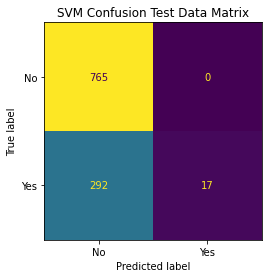

Yes as Yes (TP):  17
No as No   (TN):  765
No as Yes  (FP):  0
yes as No  (FN):  292


In [25]:
clf = SVC(probability=True).fit(x_train,y_train)
svm_pred = clf.predict(x_test)
svm_proba = clf.predict_proba(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,svm_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
f1_masure = round((2*precision*recall)/(precision+recall),2)
se = round((tp/(tp+fn)),2)
sp = round((tn/(tn+fp)),2)
acc = round(((tp+tn)/len(x_test)),2)
auc_ = round((roc_auc_score(y_test,svm_proba[:,1])),2)

print("precision : ",precision)
print("recall : ",recall)
print("f1_masure : ",f1_masure)
print("se : ",se)
print("sp : ",sp)
print("acc : ",acc)
print("auc : ",auc_)


result.append({
    'Classifier': 'SVM',
    'Precision': precision,
    'Se/Recall':recall,
    'Sp':sp,
    'F1-Measure':f1_masure,
    'Accuracy':acc,
    'AUC':auc_
})
plt.figure(figsize=(2, 3))
ConfusionMatrixDisplay.from_predictions(y_test,svm_pred,display_labels=['No','Yes'],colorbar = False)
plt.title('SVM Confusion Test Data Matrix')
plt.show()
print('Yes as Yes (TP): ',tp)
print('No as No   (TN): ',tn)
print('No as Yes  (FP): ',fp)
print('yes as No  (FN): ',fn)

precision :  1.0
recall :  0.2
f1_masure :  0.33
se :  0.2
sp :  1.0
acc :  0.77
auc :  0.6


<Figure size 144x216 with 0 Axes>

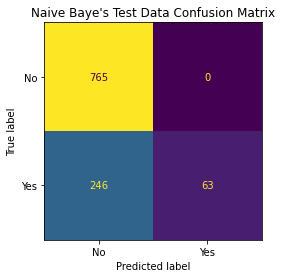

Yes as Yes (TP):  63
No as No   (TN):  765
No as Yes  (FP):  0
yes as No  (FN):  246


In [26]:
clf = GaussianNB().fit(x_train,y_train)
gnb_pred = clf.predict(x_test)
gnb_proba = clf.predict_proba(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,gnb_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
f1_masure = round((2*precision*recall)/(precision+recall),2)
se = round((tp/(tp+fn)),2)
sp = round((tn/(tn+fp)),2)
acc = round(((tp+tn)/len(x_test)),2)
auc_ = round((roc_auc_score(y_test,gnb_pred)),2)

print("precision : ",precision)
print("recall : ",recall)
print("f1_masure : ",f1_masure)
print("se : ",se)
print("sp : ",sp)
print("acc : ",acc)
print("auc : ",auc_)


result.append({
    'Classifier': 'Naive Baye\'s',
    'Precision': precision,
    'Se/Recall':recall,
    'Sp':sp,
    'F1-Measure':f1_masure,
    'Accuracy':acc,
    'AUC':auc_
})
plt.figure(figsize=(2, 3))
ConfusionMatrixDisplay.from_predictions(y_test,gnb_pred,display_labels=['No','Yes'],colorbar = False)
plt.title('Naive Baye\'s Test Data Confusion Matrix')
plt.show()
print('Yes as Yes (TP): ',tp)
print('No as No   (TN): ',tn)
print('No as Yes  (FP): ',fp)
print('yes as No  (FN): ',fn)

In [27]:
pd.DataFrame(result)

,Classifier,Precision,Se/Recall,Sp,F1-Measure,Accuracy,AUC
0,Random Forest,0.92,0.78,0.97,0.84,0.92,0.92
1,Decision Tree,0.97,0.69,0.99,0.81,0.90,0.83
2,Logistic Regression,0.87,0.27,0.98,0.41,0.78,0.75
3,K-Nearest Neighbors,0.92,0.43,0.98,0.59,0.82,0.80
4,SVM,1.00,0.06,1.00,0.11,0.73,0.77
5,Naive Baye's,1.00,0.20,1.00,0.33,0.77,0.60


In [28]:
# pd.DataFrame(result).reset_index(drop=True).to_csv('./con_mat/result evaluation.csv')

In [29]:
# plt.figure(figsize=(10, 7), dpi=100)

# def plot_roc(name,pred,i):
#     fpr, tpr, threshold = roc_curve(y_test, pred)
#     auc_ = auc(fpr,tpr)
    
#     if i%2==0:
#         plt.plot(fpr,tpr, linestyle='--', label = name+' (auc = %0.2f)' % auc_)
#     else:
#         plt.plot(fpr,tpr, linestyle='-', label = name+' (auc = %0.2f)' % auc_)
    

# plot_roc('Random Forest',RF_pred,1)
# plot_roc('SVM',svm_pred,5)
# plot_roc('K-Nearest Neighbors',Knn_pred,4)
# plot_roc('Decision Tree',DT_pred,2)
# plot_roc('Naive Baye\'s',gnb_pred,6)
# plot_roc('Logistic Regression',Los_pred,3)

# plt.plot([0,1],[0,1],'k--',label = 'Reference Line')
# plt.xlim([0,1])
# plt.ylim([0,1.05])
# plt.title('“Receiver Operating Characteristic(ROC) Curve” of test data')
# plt.xlabel('False Positive Rate (FPR) -->')
# plt.ylabel('True Positive Rate (TPR) -->')

# plt.legend()

# # plt.savefig('./con_mat/all testing result ROC-AUC.jpg')
# plt.show()

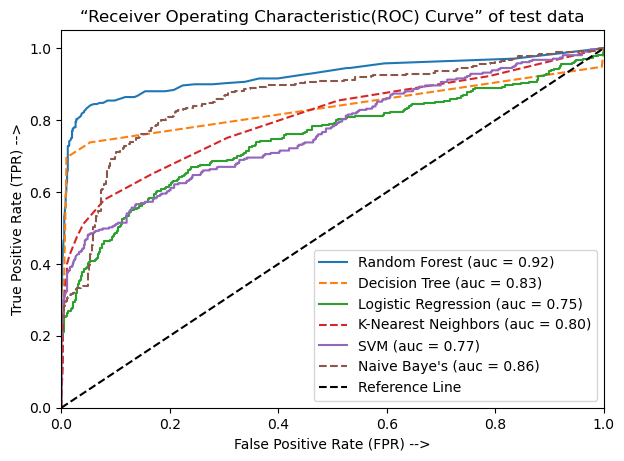

In [30]:
plt.figure(figsize=(7, 5), dpi=100)

def plot_roc(name,pred,i):
    fpr, tpr, threshold = roc_curve(y_test, pred)
    auc_ = auc(fpr,tpr)
    
    if i%2==0:
        plt.plot(fpr,tpr, linestyle='--', label = name+' (auc = %0.2f)' % auc_)
    else:
        plt.plot(fpr,tpr, linestyle='-', label = name+' (auc = %0.2f)' % auc_)
    

plot_roc('Random Forest',RF_proba[:,1],1)
plot_roc('Decision Tree',DT_proba[:,1],2)
plot_roc('Logistic Regression',Los_proba[:,1],3)
plot_roc('K-Nearest Neighbors',Knn_proba[:,1],4)
plot_roc('SVM',svm_proba[:,1],5)
plot_roc('Naive Baye\'s',gnb_proba[:,1],6)


plt.plot([0,1],[0,1],'k--',label = 'Reference Line')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('“Receiver Operating Characteristic(ROC) Curve” of test data')
plt.xlabel('False Positive Rate (FPR) -->')
plt.ylabel('True Positive Rate (TPR) -->')

plt.legend()

plt.savefig('./con_mat/all testing result ROC-AUC.jpg')
plt.show()

In [31]:
#prediction

In [32]:
model = DecisionTreeClassifier(max_depth=15).fit(x_train,y_train)

In [37]:
model.predict([[26,23.96,0,0,120,90,0,0,0,0,2]])[0]

0

In [38]:
model.predict_proba([[26,23.96,0,0,120,90,0,0,0,0,2]])

array([[0.9209529, 0.0790471]])

In [56]:
model.predict([[26,23.96,0,0,100,70,0,0,0,0,2]])

array([0], dtype=int64)

In [60]:
model.predict_proba([[26,23.96,0,0,150,70,0,0,0,0,2]])[0]

array([0.9209529, 0.0790471])